In [1]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.5
# plt.rcParams['axes.facecolor']='#EEEEEE'

In [2]:
data_dict = {}
for TB in ['Top5%','Mid5%','Near1','Btm5%']:
    data_dict[TB] = pd.read_excel(f'{Project}/Results/Tables/Codon_analysis/metagene_around_codon/v20240410_top-stalling-score/adi_top-stalling-score_metagene.xlsx', sheet_name=TB)
    data_dict[TB] = data_dict[TB].set_index(pd.Index(range(-150+15,153+15,1)))

# display(data_dict[TB])

avg_data_dict = {}
for TB in data_dict:
    avg_data_dict[TB] = pd.DataFrame()
    for day in ['0','4','8']:
        avg_data_dict[TB][f'D{day}'] = data_dict[TB][[f'D{day}{rep}' for rep in ['a','b','c']]].mean(axis=1)

display(avg_data_dict[TB])

,D0,D4,D8
-135,1.484556,1.545799,1.645867
-134,0.192852,0.156621,0.164371
-133,0.937753,1.008100,0.919169
-132,1.498639,1.564201,1.709538
-131,0.189792,0.152134,0.166469
...,...,...,...
163,0.158120,0.112723,0.118445
164,0.936169,0.950425,0.840794
165,1.493655,1.449176,1.530078
166,0.157925,0.109755,0.119638


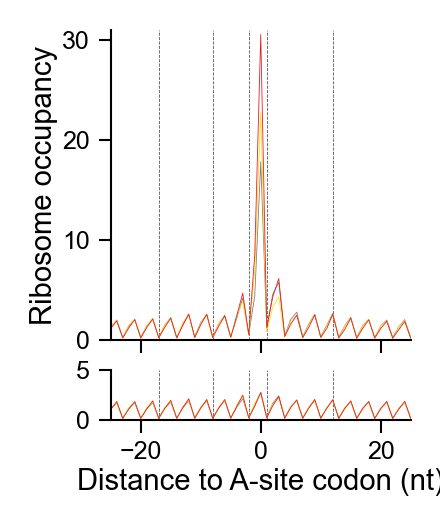

In [5]:
sF = 1 # Size factor
wgap = 0.1
hgap = 0.1
nrow, ncol = 2, 1

width_ratios = [1]
height_ratios = [1.2*(31/36), 1.2*(5/36)]

fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF
fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    width_ratios=width_ratios,
                    height_ratios=height_ratios,
                    wspace=wgap/np.average(width_ratios), 
                    hspace=hgap/np.average(height_ratios),
                    left=0, right=1, bottom=0, top=1)

row = 0
col = 0
for TB in ['Top5%','Mid5%']:
    ax = fig.add_subplot(grid[row,col])

    adj = -2
    # ax.axvspan(-15+adj, 14+adj, 0, 1, color='#E5E5E5', lw=0)
    # ax.axvspan(-6+adj, 3+adj, 0, 1, color='#D8D8D8', lw=0)
    # ax.axvspan(0+adj, 3+adj, 0, 1, color='#CCCCCC', lw=0)
    ax.axvline(-15+adj, c='#555555', lw=0.2, ls='--')
    ax.axvline(-6+adj, c='#555555', lw=0.2, ls='--')
    ax.axvline(adj, c='#555555', lw=0.2, ls='--')
    ax.axvline(3+adj, c='#555555', lw=0.2, ls='--')
    ax.axvline(14+adj, c='#555555', lw=0.2, ls='--')
    for day in ['0','4','8']:
        ax.plot(avg_data_dict[TB].loc[-25:25, f'D{day}'].index,
                avg_data_dict[TB].loc[-25:25, f'D{day}'],
                lw=0.2, color={'0':'#808080', '4':'#FFDE17', '8':'#ED1C24'}[day], alpha=1)
                # lw=0.2, color={'0':'#808080', '4':'#FF33FF', '8':'#3399FF'}[day], alpha=1)

    ax.set_xlim(-25, 25)
    if row==0 : ax.set_ylim(0, 31)
    if row==1 : ax.set_ylim(0, 5)
    # ax.set_xticks([-150,-100,-50,0,50,100,150])
    # ax.set_yticks([0,10,20,30])
    ax.tick_params(length=3, width=0.5, pad=2)
    if row==0 : ax.set_xticklabels([])

    if row==1: 
        ax.set_xlabel('Distance to A-site codon (nt)', labelpad=1)
    if row==0:
        ax.set_ylabel("Ribosome occupancy", labelpad=1)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)
    # ax.spines['left'].set_visible(False)

    row+=1

plt.savefig('adi_top-stalling-score_metagene.pdf', bbox_inches='tight')
plt.show()
plt.close()